In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

# # Para deixar os plots brancos
# params = {"ytick.color" : "w",
#           "xtick.color" : "w",
#           "axes.titlecolor" : "w",
#           "axes.labelcolor" : "w",
#           "axes.edgecolor" : "w"}
# plt.rcParams.update(params)

In [2]:
net_result = np.load(r'C:\Users\kaioh\Documents\Universidade\State Estimation\dataset\MC_3phase_V_std_01_samples_1000_21_12-12_26.npz')

In [3]:
voltages1 = net_result['voltages'][0]
voltages2 = net_result['voltages'][1]
voltages3 = net_result['voltages'][2]

# 58 connections to node 1 - 50 connections to node 2 - 46 connections to node 3 
voltages1 = voltages1[~np.isnan(voltages1)].reshape(144000,48)
voltages2 = voltages2[~np.isnan(voltages2)].reshape(144000,50)
voltages3 = voltages3[~np.isnan(voltages3)].reshape(144000,46)

voltages1 = pd.DataFrame(voltages1)
voltages2 = pd.DataFrame(voltages2)
voltages3 = pd.DataFrame(voltages3)


In [4]:
p_trafo1 = pd.DataFrame(net_result['p_trafo'][0], columns = ['p_trafo1'])
q_trafo1 = pd.DataFrame(net_result['q_trafo'][0], columns = ['q_trafo1'])
p_trafo2 = pd.DataFrame(net_result['p_trafo'][1], columns = ['p_trafo2'])
q_trafo2 = pd.DataFrame(net_result['q_trafo'][1], columns = ['q_trafo2'])
p_trafo3 = pd.DataFrame(net_result['p_trafo'][2], columns = ['p_trafo3'])
q_trafo3 = pd.DataFrame(net_result['q_trafo'][2], columns = ['q_trafo3'])

In [5]:
# net_result = loadmat('dataset/resultados_w1000pts.mat')
demand_p1 = net_result['demand_p'][0]
demand_q1 = net_result['demand_q'][0]
demand_p2 = net_result['demand_p'][1]
demand_q2 = net_result['demand_q'][1]
demand_p3 = net_result['demand_p'][2]
demand_q3 = net_result['demand_q'][2]

# 51 connections to node 1 - 49 connections to node 2 - 51 connections to node 3 
demand_p1 = demand_p1[~np.isnan(demand_p1)].reshape(144,1000,51)
demand_q1 = demand_q1[~np.isnan(demand_q1)].reshape(144,1000,51)
demand_p2 = demand_p2[~np.isnan(demand_p2)].reshape(144,1000,49)
demand_q2 = demand_q2[~np.isnan(demand_q2)].reshape(144,1000,49)
demand_p3 = demand_p3[~np.isnan(demand_p3)].reshape(144,1000,51)
demand_q3 = demand_q3[~np.isnan(demand_q3)].reshape(144,1000,51)

# take the mean
avgP1 = demand_p1[:, :999, :].mean(axis=1)
avgQ1 = demand_q1[:, :999, :].mean(axis=1)
avgP2 = demand_p2[:, :999, :].mean(axis=1)
avgQ2 = demand_q2[:, :999, :].mean(axis=1)
avgP3 = demand_p3[:, :999, :].mean(axis=1)
avgQ3 = demand_q3[:, :999, :].mean(axis=1)

avgP1 = pd.concat([pd.DataFrame(avgP1)]*1000, ignore_index=True)
avgQ1 = pd.concat([pd.DataFrame(avgQ1)]*1000, ignore_index=True)
avgP2 = pd.concat([pd.DataFrame(avgP2)]*1000, ignore_index=True)
avgQ2 = pd.concat([pd.DataFrame(avgQ2)]*1000, ignore_index=True)
avgP3 = pd.concat([pd.DataFrame(avgP3)]*1000, ignore_index=True)
avgQ3 = pd.concat([pd.DataFrame(avgQ3)]*1000, ignore_index=True)

avgP1.columns = [f'P1_{col_name}' for col_name in avgP1.columns]
avgP2.columns = [f'P2_{col_name}' for col_name in avgP2.columns]
avgP3.columns = [f'P3_{col_name}' for col_name in avgP3.columns]
avgQ1.columns = [f'Q1_{col_name}' for col_name in avgQ1.columns]
avgQ2.columns = [f'Q2_{col_name}' for col_name in avgQ2.columns]
avgQ3.columns = [f'Q3_{col_name}' for col_name in avgQ3.columns]

In [6]:
pv = np.load(r'dataset\PV_Curves_Ijui_RS_1000_Samples_15_12-16_52.npz')

pv = pd.DataFrame(pv['PV_s'].flatten(), columns = ['pv'])

In [7]:
## Creating the input arrays for train and test
## X - train set 70%
## X_test - test set 30%

X1 = pd.concat([pv, p_trafo1, avgP1, q_trafo1, avgQ1], axis=1)
X2 = pd.concat([pv, p_trafo2, avgP2, q_trafo2, avgQ2], axis=1)
X3 = pd.concat([pv, p_trafo3, avgP3, q_trafo3, avgQ3], axis=1)


# # Removing features that don't change
# features_to_drop = X.nunique()
# features_to_drop = features_to_drop.loc[features_to_drop.values==1].index

# X = X.drop(features_to_drop,axis=1)

X1 = X1.iloc[21600:,:]
X1_test = X1.iloc[:21600,:]
X2 = X2.iloc[21600:,:]
X2_test = X2.iloc[:21600,:]
X3 = X3.iloc[21600:,:]
X3_test = X3.iloc[:21600,:]


In [8]:
## Creating the output arrays for train and test, and droping the reference(trafo) buses
## Y - train set
## y_test - test set
Y1 = voltages1
y1_test = Y1.iloc[:21600,:]
Y1 = Y1.iloc[21600:,:]

Y2 = voltages2
y2_test = Y2.iloc[:21600,:]
Y2 = Y2.iloc[21600:,:]

Y3 = voltages3
y3_test = Y3.iloc[:21600,:]
Y3 = Y3.iloc[21600:,:]



In [37]:
phase = 1

if phase == 1:
    X = X1
    Y = Y1
    X_test = X1_test
    y_test = y1_test
elif phase == 2:
    X = X2
    Y = Y2
    X_test = X2_test
    y_test = y2_test
elif phase == 3:
    X = X3
    Y = Y3
    X_test = X3_test
    y_test = y3_test

p_columns = [name for name in X.columns if name.startswith('P')]
q_columns = [name for name in X.columns if name.startswith('Q')]
p_trafo = [name for name in X.columns if name.startswith('p_')]
q_trafo = [name for name in X.columns if name.startswith('q_')]
pv_column = [name for name in X.columns if name.startswith('pv')]


In [11]:
from sklearn.model_selection import train_test_split

## Spliting the train dataset into train and validation data
X_train, X_eval, y_train, y_eval = train_test_split(X,Y,test_size=0.176,random_state=101)

c:\Users\kaioh\anaconda3\envs\nn\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [12]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, MaxAbsScaler

active_power_scaler = MinMaxScaler()
X_train.loc[:, p_columns] = active_power_scaler.fit_transform(X_train.loc[:, p_columns])
X_eval.loc[:, p_columns] = active_power_scaler.transform(X_eval.loc[:, p_columns])
X_test.loc[:, p_columns] = active_power_scaler.transform(X_test.loc[:, p_columns])

pv_scaler = MinMaxScaler()
X_train.loc[:, pv_column] = pv_scaler.fit_transform(X_train.loc[:, pv_column])
X_eval.loc[:, pv_column] = pv_scaler.transform(X_eval.loc[:, pv_column])
X_test.loc[:, pv_column] = pv_scaler.transform(X_test.loc[:, pv_column])

ptrafo_scaler = MinMaxScaler()
X_train.loc[:, p_trafo] = ptrafo_scaler.fit_transform(X_train.loc[:, p_trafo])
X_eval.loc[:, p_trafo] = ptrafo_scaler.transform(X_eval.loc[:, p_trafo])
X_test.loc[:, p_trafo] = ptrafo_scaler.transform(X_test.loc[:, p_trafo])

reactive_power_scaler = MinMaxScaler()
X_train.loc[:, q_columns] = reactive_power_scaler.fit_transform(X_train.loc[:, q_columns])
X_eval.loc[:, q_columns] = reactive_power_scaler.transform(X_eval.loc[:, q_columns])
X_test.loc[:, q_columns] = reactive_power_scaler.transform(X_test.loc[:, q_columns])

qtrafo_scaler = MinMaxScaler()
X_train.loc[:, q_trafo] = qtrafo_scaler.fit_transform(X_train.loc[:, q_trafo])
X_eval.loc[:, q_trafo] = qtrafo_scaler.transform(X_eval.loc[:, q_trafo])
X_test.loc[:, q_trafo] = qtrafo_scaler.transform(X_test.loc[:, q_trafo])


C:\Users\kaioh\AppData\Local\Temp\ipykernel_20960\3220760517.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[:, p_columns] = active_power_scaler.transform(X_test.loc[:, p_columns])
C:\Users\kaioh\AppData\Local\Temp\ipykernel_20960\3220760517.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[:, pv_column] = pv_scaler.transform(X_test.loc[:, pv_column])
C:\Users\kaioh\AppData\Local\Temp\ipykernel_20960\3220760517.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

In [20]:
from tensorflow import keras
from tensorflow.keras.layers import Dense, Dropout
import kerastuner as kt

class MyHyperModel(kt.HyperModel):
    def build(self, hp):
        model = keras.Sequential()

        hp_units = hp.Int('units', min_value=100, max_value=600, step=100)
        
        hp_dropout_rate = hp.Choice('rate', values=[0.0, 0.2])

        model.add(Dense(units=hp_units, activation='relu', input_shape=(X_train.shape[-1],)))
        model.add(Dropout(rate=hp_dropout_rate))
        model.add(Dense(units=hp_units, activation='relu'))
        model.add(Dropout(rate=hp_dropout_rate))
        model.add(Dense(units=100, activation='relu'))
        model.add(Dense(units=y_train.shape[-1], activation=None))

        hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
        model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                        loss='mse', metrics=['MAE'])
        return model

    def fit(self, hp, model, *args, **kwargs):
        return model.fit(
            *args,
            batch_size=hp.Choice("batch_size", [50, 100, 150, 200]),
            **kwargs,
        )

tuner = kt.Hyperband(
    MyHyperModel(),
    objective="loss",
    max_epochs=50,
    directory="my_dir",
    project_name="tune_hypermodel",
)

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import SGD, Adam

batch_size = 75
epochs = 500

## Creating the model
model = Sequential()

model.add(Dense(units=300, activation='relu', input_shape=(X_train.shape[-1],)))
model.add(Dropout(rate=0.2))
model.add(Dense(units=300, activation='relu'))
model.add(Dropout(rate=0.2))
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=y_train.shape[-1], activation=None))

model.compile(optimizer=Adam(learning_rate=0.0001), loss='mse', metrics=['MAE'])

In [21]:
from tensorflow.keras.callbacks import EarlyStopping

# Early stopping monitorando a Validation Loss
early_stopping = EarlyStopping(
    monitor="val_loss",
    min_delta = 0.001, # Valor mínimo de mudança para considerar como melhoria
    patience  = 20,     # Quantas épocas esperar até parar
    mode = 'auto',
    restore_best_weights=True
)

In [22]:
tuner.search(x=X_train,y=y_train, validation_data=(X_eval,y_eval), epochs=200, callbacks=[early_stopping])

# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

Trial 90 Complete [00h 02m 13s]
loss: 120.88752746582031

Best loss So Far: 10.238919258117676
Total elapsed time: 01h 24m 54s
INFO:tensorflow:Oracle triggered exit


In [33]:
print('learning rate', best_hps.get('learning_rate'))
print('batch size', best_hps.get('batch_size'))
print('dropout', best_hps.get('rate'))
print('units', best_hps.get('units'))

learning rate 0.001
batch size 50
dropout 0.0
units 200


In [26]:
model = tuner.hypermodel.build(best_hps)
history = model.fit(x=X_train,y=y_train,
        validation_data=(X_eval,y_eval),
        epochs=300,
        callbacks=[early_stopping])

Epoch 1/300
3152/3152 [==============================] - 9s 3ms/step - loss: 116272.1797 - MAE: 45.7219 - val_loss: 10704.7754 - val_MAE: 22.9673
Epoch 2/300
3152/3152 [==============================] - 9s 3ms/step - loss: 5244.5850 - MAE: 15.1449 - val_loss: 1425.1284 - val_MAE: 8.9494
Epoch 3/300
3152/3152 [==============================] - 10s 3ms/step - loss: 492.2420 - MAE: 5.6738 - val_loss: 157.3257 - val_MAE: 6.3558
Epoch 4/300
3152/3152 [==============================] - 9s 3ms/step - loss: 48.1497 - MAE: 2.6533 - val_loss: 19.1212 - val_MAE: 2.7714
Epoch 5/300
3152/3152 [==============================] - 9s 3ms/step - loss: 19.4890 - MAE: 2.1049 - val_loss: 8.4037 - val_MAE: 1.4660
Epoch 6/300
3152/3152 [==============================] - 9s 3ms/step - loss: 14.4261 - MAE: 1.9541 - val_loss: 26.9564 - val_MAE: 2.5918
Epoch 7/300
3152/3152 [==============================] - 9s 3ms/step - loss: 12.8764 - MAE: 1.9103 - val_loss: 2.9152 - val_MAE: 1.2291
Epoch 8/300
3152/3152 [===

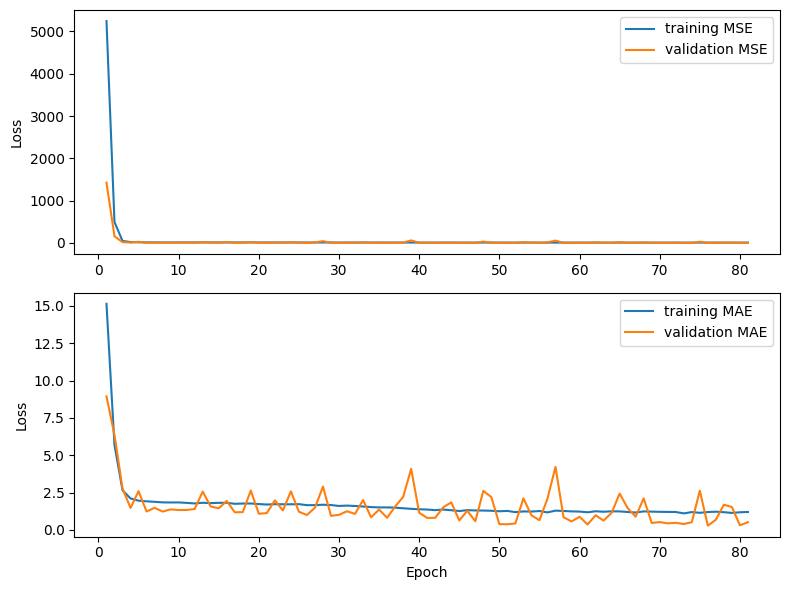

In [29]:
# Plot loss curve MAE curve
logs = pd.DataFrame(history.history)

# plt.style.use('matplot.mplstyle')
plt.figure(figsize = (8,6), dpi = 100)
plt.subplot(2, 1, 1)
plt.plot(logs.loc[1:,"loss"], label='training MSE')
plt.plot(logs.loc[1:,"val_loss"], label='validation MSE')
plt.ylabel("Loss")
plt.legend(loc='upper right')

plt.subplot(2, 1, 2)
plt.plot(logs.loc[1:,"MAE"], label='training MAE')
plt.plot(logs.loc[1:,"val_MAE"], label='validation MAE')
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(loc='upper right')
# plt.legend()
# plt.subplot(1, 2, 2)
# plt.plot(logs.loc[5:,"MAE"], label='training MAE')
# plt.plot(logs.loc[5:,"val_MAE"], label='validation MAE')
# plt.xlabel("Epoch")
# plt.ylabel("MAE")

plt.tight_layout()
date = datetime.now().strftime('%d_%m-%H_%M')
plt.savefig(f"Loss_Curve_top_phaseA_83-300_{date}.jpg")
plt.savefig(f"Loss_Curve_top_phaseA_83-300_{date}.svg")
plt.show()

In [44]:
date = datetime.now().strftime('%d_%m-%H_%M')
model.save(f'PhaseA_top_V_train_{50}batch_83-300epochs_{date}.h5')

In [39]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
# from tensorflow.keras.models import load_model
# model = load_model(r'PhaseA_V_train_200batch_1000epochs_22_12-00_32.h5')

predictions = model.predict(X_test)

print(f"Mean Absolute Error: {mean_absolute_error(y_test.values,predictions)}")
print(f"Mean Squared Error: {np.sqrt(mean_squared_error(y_test.values,predictions))}")

675/675 [==============================] - 1s 1ms/step
Mean Absolute Error: 0.421825676526725
Mean Squared Error: 0.6519665735218063


In [42]:
plt.style.use('matplot.mplstyle')
# Tensão em Volts
for i in [5,22,65,100,149]:
    for bar in [5,15,38]:
        t = np.arange(144)
        plt.figure(figsize = (13,6), dpi = 300)
        plt.plot(t,y_test.values[(i*144):((i*144)+144), bar], 'C1', lw = 3.5, label = 'Dataset')
        plt.plot(t,predictions[(i*144):((i*144)+144), bar], 'C0', lw = 2, label = 'Predictions')
        
        plt.xticks(np.arange(0, 145, 12), ('0h', '2h', '4h', '6h', '8h', '10h', '12h', '14h','16h', '18h', '20h', '22h', '24h'))
        plt.ylim(200, 235)
        plt.axhline(231, color="black", lw = 2, linestyle="--")
        plt.axhline(202, color="black", lw = 2, linestyle="--")
        plt.ylabel('V')
        plt.title(f'Voltage Bar{bar} - Day {i} - With P/Q as Input', fontsize=22)
        plt.legend(loc='upper right', framealpha=1)
        plt.savefig(f"PhaseA_V_Voltage_Bar{bar}_Day{i}_PQ-025.jpg")
        plt.tight_layout()
        plt.margins(x=0)
        plt.grid(True)
        plt.close()

In [48]:
plt.style.use('matplot.mplstyle')

for i in [5,22,65,100,200]:
    for bar in [5,15,38]:
        t = np.arange(144)
        plt.figure(figsize = (13,6), dpi = 300)
        plt.plot(t,y_test.values[(i*144):((i*144)+144), bar], 'C1', lw = 3.5, label = 'Dataset')
        plt.plot(t,predictions[(i*144):((i*144)+144), bar], 'C0', lw = 2, label = 'Predictions')
        
        plt.xticks(np.arange(0, 145, 12), ('0h', '2h', '4h', '6h', '8h', '10h', '12h', '14h','16h', '18h', '20h', '22h', '24h'))
        plt.ylim(0.89, 1.07)
        plt.axhline(1.05, color="black", lw = 2, linestyle="--")
        plt.axhline(0.92, color="black", lw = 2, linestyle="--")
        plt.ylabel('p.u.')
        plt.title(f'Voltage Bar{bar} - Day {i} - With P/Q as Input', fontsize=22)
        plt.legend(loc='upper right', framealpha=1)
        plt.savefig(f"PhaseC_Voltage_Bar{bar}_Day{i}_PQ-025.jpg")
        plt.tight_layout()
        plt.margins(x=0)
        plt.grid(True)
        plt.close()

In [51]:
from tensorflow.keras.models import load_model
model_1 = load_model(r'PhaseA_train_70batch_150epochs_19_12-23_48.h5')
model_2 = load_model(r'PhaseB_train_70batch_150epochs_19_12-23_54.h5')
model_3 = load_model(r'PhaseC_train_70batch_150epochs_19_12-23_57.h5')

predictions1 = model_1.predict(X1_test)
predictions2 = model_2.predict(X2_test)
predictions3 = model_3.predict(X3_test)

1350/1350 [==============================] - 4s 2ms/step


In [ ]:
bar = 7
t = np.arange(144)
for i in [5,22,65,100,200]:
    plt.figure(figsize = (13,6), dpi = 300)
    plt.plot(t,y1_test.values[(i*144):((i*144)+144), 5], 'C0', lw = 2, label = 'Dataset Phase A')
    plt.plot(t,y2_test.values[(i*144):((i*144)+144), 5], 'C1', lw = 2, label = 'Dataset Phase B')
    plt.plot(t,y3_test.values[(i*144):((i*144)+144), 5], 'C2', lw = 2, label = 'Dataset Phase C')
    plt.plot(t,predictions1[(i*144):((i*144)+144), 5], 'C0', linestyle="--", lw = 1, label = 'Predictions Phase A')
    plt.plot(t,predictions2[(i*144):((i*144)+144), 5], 'C1', linestyle="--", lw = 1, label = 'Predictions Phase B')
    plt.plot(t,predictions3[(i*144):((i*144)+144), 5], 'C2', linestyle="--", lw = 1, label = 'Predictions Phase C')
    
    plt.xticks(np.arange(0, 145, 12), ('0h', '2h', '4h', '6h', '8h', '10h', '12h', '14h','16h', '18h', '20h', '22h', '24h'))
    plt.ylim(0.89, 1.07)
    plt.axhline(1.05, color="black", lw = 2, linestyle="--")
    plt.axhline(0.92, color="black", lw = 2, linestyle="--")
    plt.ylabel('p.u.')
    plt.title(f'Voltage Bar{bar} - Day {i} - With P/Q as Input', fontsize=22)
    plt.legend(loc='upper right', framealpha=1)
    plt.savefig(fr"results\PhaseComp_Voltage_Bar{bar}_Day{i}_PQ-025.jpg")
    plt.tight_layout()
    plt.margins(x=0)
    plt.grid(True)
    plt.close()

In [40]:
### Testing the model in a dataset with more variance

net_result = np.load('dataset/MC_Simulation_std_05_samples_1000_01_09-22_34.npz')
# net_result = loadmat('dataset/resultados_w1000pts.mat')
ptrafo1 = pd.DataFrame(net_result['demand_p1'], columns = ['Ptrafo1'])
ptrafo2 = pd.DataFrame(net_result['demand_p2'], columns = ['Ptrafo2'])

demand_p = pd.DataFrame(net_result['demand_p'])
demand_p.columns = [f'P{col_name}' for col_name in demand_p.columns]
demand_p = demand_p.drop(['P0','P25'], axis=1)

demand_q = pd.DataFrame(net_result['demand_q'])
demand_q.columns = [f'Q{col_name}' for col_name in demand_q.columns]
demand_q = demand_q.drop(['Q0','Q25'], axis=1)

voltages = pd.DataFrame(net_result['voltages'])

vref1 = voltages.iloc[:, 0]
vref2 = voltages.iloc[:, 25]

voltages.shape

(144000, 42)

In [44]:
## Creating a averageP/Q array of (144 x 42) by taking the mean value of all 1000 samples
## Repeating it 1000 times to match the 144000 samples of the cargaP/Q array
## Droping the 0th and 25th powers because this represents the transformer reference values
avgP = net_result['demand_p'].reshape(144,1000,42).mean(axis=1)
avgQ = net_result['demand_q'].reshape(144,1000,42).mean(axis=1)

avgP = pd.DataFrame(avgP)
avgP  = pd.concat([avgP]*1000, ignore_index=True)
avgP.columns = [f'P{col_name}' for col_name in avgP.columns]
avgP = avgP.drop(['P0','P25'], axis=1)

avgQ = pd.DataFrame(avgQ)
avgQ  = pd.concat([avgQ]*1000, ignore_index=True)
avgQ.columns = [f'Q{col_name}' for col_name in avgQ.columns]
avgQ = avgQ.drop(['Q0','Q25'], axis=1)

pv = np.load('dataset/PV_Curves_1000_Samples_01_09-23_31.npz')

pv_12 = pd.DataFrame(pv['PV_w'].flatten(), columns = ['pv_12'])
pv_18 = pd.DataFrame(pv['PV_w'].flatten(), columns = ['pv_18'])
pv_25 = pd.DataFrame(pv['PV_w'].flatten(), columns = ['pv_25'])
pv_29 = (1/47) * pd.DataFrame(pv['PV_w'].flatten(), columns = ['pv_29'])
pv_32 = (1/42) * pd.DataFrame(pv['PV_w'].flatten(), columns = ['pv_32'])
## Creating the input arrays for train and test
## X - train set 70%
## X_test - test set 30%

X = pd.concat([vref1, vref2, pv_12, pv_18, pv_25, pv_29, pv_32, ptrafo1, ptrafo2, avgP, avgQ], axis=1)
X.rename(columns = {0:'V0', 25:'V25'}, inplace = True)

## Creating the output arrays for train and test, and droping the reference(trafo) buses
## Y - train set
## y_test - test set

Y = voltages.drop([0,25], axis=1)

## Spliting the train dataset into train and validation data
X_train, X_eval, y_train, y_eval = train_test_split(X,Y,test_size=0.5,random_state=202)

## Scaling the input array
voltage_scaler = MinMaxScaler()
X_train.loc[:, voltage_columns] = voltage_scaler.fit_transform(X_train.loc[:, voltage_columns])
X_eval.loc[:, voltage_columns] = voltage_scaler.transform(X_eval.loc[:, voltage_columns])

active_power_scaler = MinMaxScaler()
X_train.loc[:, active_power_columns] = active_power_scaler.fit_transform(X_train.loc[:, active_power_columns])
X_eval.loc[:, active_power_columns] = active_power_scaler.transform(X_eval.loc[:, active_power_columns])

reactive_power_scaler = MinMaxScaler()
X_train.loc[:, reactive_power_columns] = reactive_power_scaler.fit_transform(X_train.loc[:, reactive_power_columns])
X_eval.loc[:, reactive_power_columns] = reactive_power_scaler.transform(X_eval.loc[:, reactive_power_columns])


In [47]:
from tensorflow.keras.models import load_model
new_model = load_model(r'70train_70batch_150epochs_19_10-01_48.h5')

predictions = new_model.predict(X_train)

print(f"Mean Absolute Error: {mean_absolute_error(y_train.values,predictions)}")
print(f"Mean Squared Error: {np.sqrt(mean_squared_error(y_train.values,predictions))}")

Mean Absolute Error: 0.0029046361182877047
Mean Squared Error: 0.004494268782466886


In [48]:
plt.style.use('matplot.mplstyle')

for i in [5,22,65,100,200]:
    for bar in [5,15,38]:
        t = np.arange(144)
        plt.figure(figsize = (13,6), dpi = 300)
        plt.plot(t,y_train.values[(i*144):((i*144)+144), bar], 'C1', lw = 3.5, label = 'Dataset')
        plt.plot(t,predictions[(i*144):((i*144)+144), bar], 'C0', lw = 2, label = 'Predictions')
        
        plt.xticks(np.arange(0, 145, 12), ('0h', '2h', '4h', '6h', '8h', '10h', '12h', '14h','16h', '18h', '20h', '22h', '24h'))
        plt.ylim(0.89, 1.07)
        plt.axhline(1.05, color="black", lw = 2, linestyle="--")
        plt.axhline(0.92, color="black", lw = 2, linestyle="--")
        plt.ylabel('p.u.')
        plt.title(f'Voltage Bar{bar} - Day {i} - With P/Q as Input', fontsize=22)
        plt.legend(loc='upper right', framealpha=1)
        plt.savefig(f"05_Prediction_Voltage_Bar{bar}_Day{i}_PQ.jpg")
        plt.tight_layout()
        plt.margins(x=0)
        plt.grid(True)
        plt.close()